In [2]:
! pip install pandas
! pip install matplotlib

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [5]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [6]:
sample_data = [
    ("Laptops",500,53000),
    ("Desktops",350,100000),
    ("Headphones",800,3000),
    ("Keyboards",400,1200),
    ("Mouse",600,600),
    ("Smartwatches",1000,7000),
    ("Monitor",850,12000),
    ("RAM",950,26000),
    ("SSD",650,5000),
    ("TWS",2000,1000),
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [9]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [11]:
print("Sales Summary:")
print(df)

Sales Summary:
        product  total_qty     revenue
0      Desktops        350  35000000.0
1    Headphones        800   2400000.0
2     Keyboards        400    480000.0
3       Laptops        500  26500000.0
4       Monitor        850  10200000.0
5         Mouse        600    360000.0
6           RAM        950  24700000.0
7           SSD        650   3250000.0
8  Smartwatches       1000   7000000.0
9           TWS       2000   2000000.0


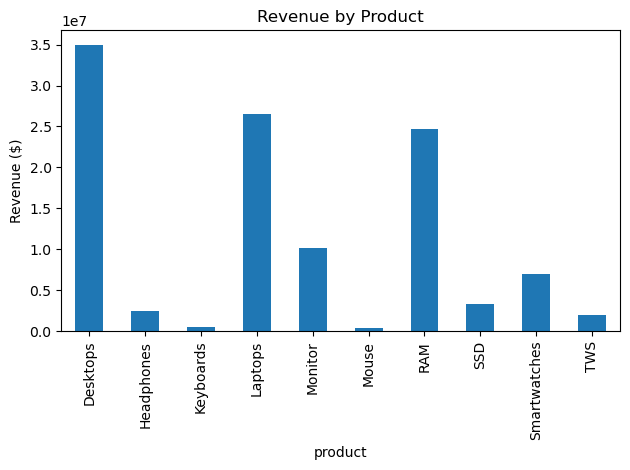

In [13]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()

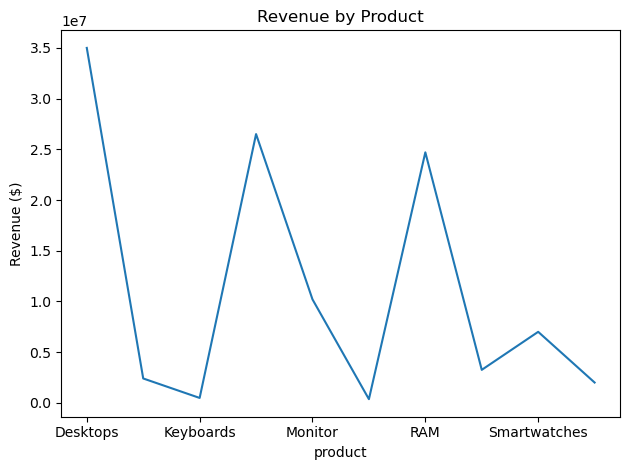

In [15]:
df.plot(kind='line', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()

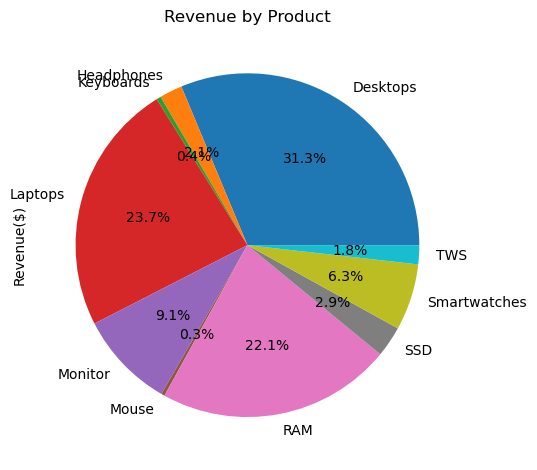

In [22]:
df.set_index('product')['revenue'].plot(kind='pie', legend=False, autopct='%1.1f%%')
plt.title("Revenue by Product")
plt.ylabel("Revenue($)")
plt.tight_layout()
plt.show()

In [23]:
conn.close()